# K-means clustering
______

#### Data Exploration and Preprocessing

In [1]:
# import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the dataset
df = pd.read_csv("drug_3.csv", index_col="ID")
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Benzos,Amphet
ID,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,1,1
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


In [3]:
# describe the dataset
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Benzos,Amphet
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,0.671088,0.407958,0.360212
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,0.469943,0.491586,0.480189
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000,0.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000,0.000000,0.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000,1.000000,1.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000,1.000000,1.000000


In [4]:
# check for null values
df.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Cannabis     0
Benzos       0
Amphet       0
dtype: int64

No null values are observed

In [5]:
# dataframe size
df.shape

(1885, 15)

The dataset contains 1885 entries and 15 columns. 

In [6]:
# splitting the dataset to attributes and classes
X = df.iloc[:,:-3]
y = df.iloc[:,-3:]

In [7]:
# normalise the attributes data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(df.iloc[:,:-3])
X_scale_cols = df.columns[:-3]
X_scale = pd.DataFrame(X_scale, columns=X_scale_cols)
X_scale.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.409137,1.0,0.537681,1.0,0.409061,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.246475,0.0,1.000000,1.0,0.262143,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.409137,0.0,0.537681,1.0,0.262143,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.000000,1.0,0.814329,1.0,0.262143,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.409137,1.0,1.000000,1.0,0.262143,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658


In [8]:
# split the dataset to demographic data and personality data. 

df_demographic = X_scale.iloc[:, :4]
df_personality = X_scale.iloc[:, 5:]

Text(0.5, 1, 'Personality Data')

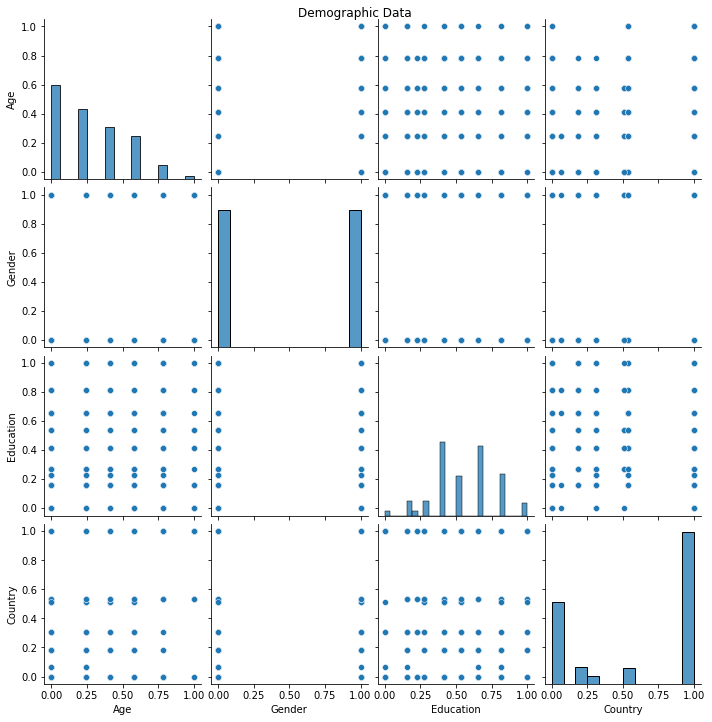

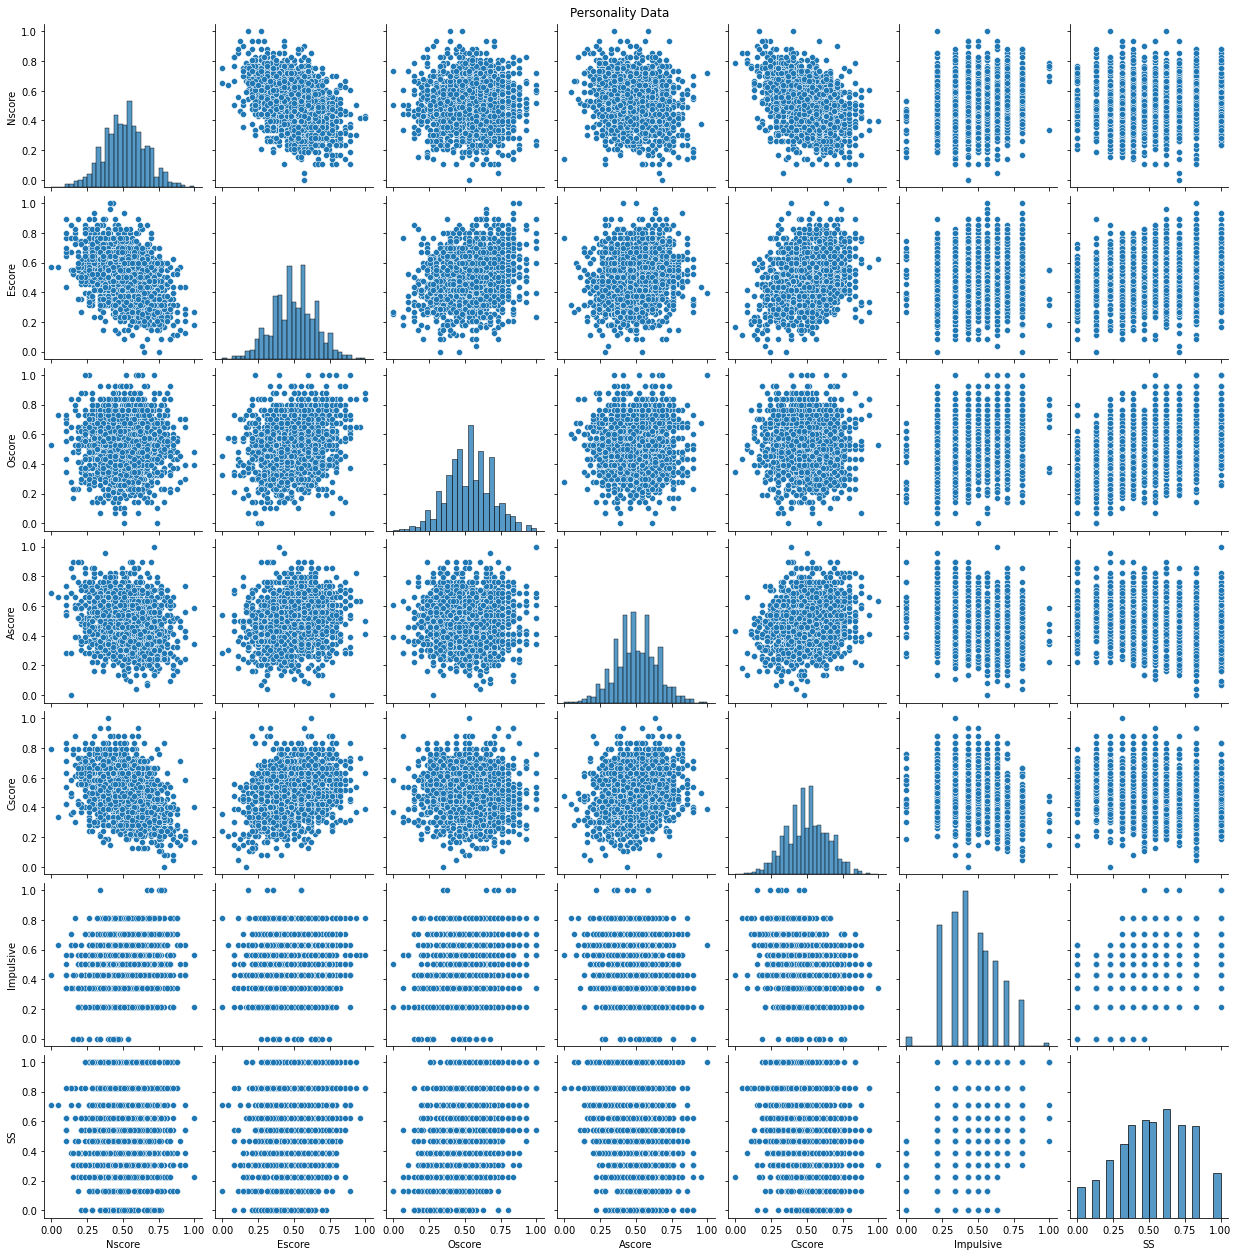

In [9]:
# visualise the distribution of demographic and personality data. 

p = sns.pairplot(df_demographic)
p.fig.suptitle("Demographic Data", y=1)

q = sns.pairplot(df_personality)
q.fig.suptitle("Personality Data", y=1)

## Perform K-Means Clusterinng on Attribute Data

### Using only two columns

#### Age vs Education

In [10]:
# import KMeans class from sklearn
from sklearn.cluster import KMeans

# set k=2 since we are assuming that there will be two output, namely those with tendancy to do drugs and one which will not. 
kmeans_demographic_ae = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_demographic_ae.fit(df_demographic[["Age", "Education"]])

KMeans(n_clusters=2, random_state=0)

In [11]:
# sum of square distances
kmeans_demographic_ae.inertia_

114.8007994154715

In [12]:
centroids_demographic_ae = kmeans_demographic_ae.cluster_centers_
print(centroids_demographic_ae)

[[0.06837987 0.44122508]
 [0.45349493 0.64107508]]


Text(0.42349493298619356, 0.6110750838397861, 'Cluster 1')

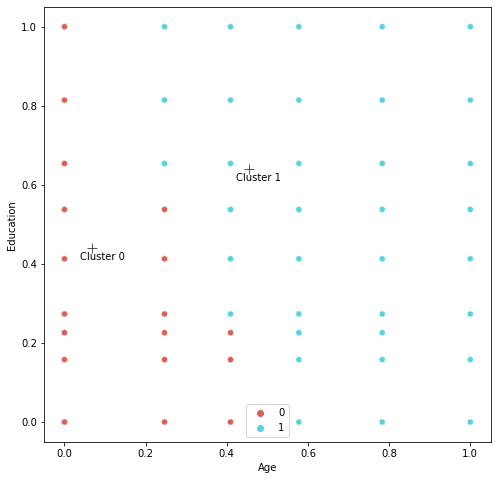

In [13]:
offset = 0.03

demographic_pred_ae = kmeans_demographic_ae.predict(df_demographic[["Age", "Education"]])
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=df_demographic["Age"], y=df_demographic["Education"], hue=demographic_pred_ae, palette="hls")
sns.scatterplot(x=centroids_demographic_ae[:,0], y=centroids_demographic_ae[:,1], marker='+', color=".2", s=100)
ax.annotate('Cluster 0', xy=(centroids_demographic_ae[0,0]-offset,centroids_demographic_ae[0,1]-offset))
ax.annotate('Cluster 1', xy=(centroids_demographic_ae[1,0]-offset,centroids_demographic_ae[1,1]-offset))

Two clusters are generated. \
The **intertia** of clusters generated using education and age data is 114.8007994154715 \
The **centroids** are located at (0.06837987, 0.44122508) and (0.45349493, 0.64107508)

#### Gender vs Country

In [14]:
# set k=2 since we are assuming that there will be two output, namely those with tendancy to do drugs and one which will not. 
kmeans_demographic_gc = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_demographic_gc.fit(df_demographic[["Gender", "Country"]])

KMeans(n_clusters=2, random_state=0)

In [15]:
# sum of square distances
kmeans_demographic_gc.inertia_

375.8284355862718

In [16]:
centroids_demographic_gc = kmeans_demographic_gc.cluster_centers_
print(centroids_demographic_gc)

[[ 1.00000000e+00  7.03591002e-01]
 [-5.55111512e-17  5.05771403e-01]]


Text(-0.030000000000000054, 0.4757714028971858, 'Cluster 1')

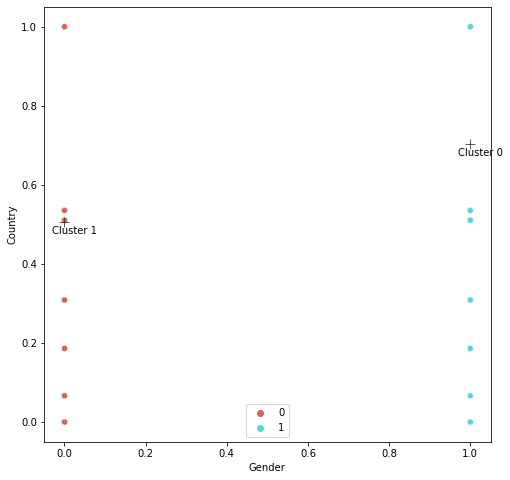

In [17]:
offset = 0.03

demographic_pred_gc = kmeans_demographic_ae.predict(df_demographic[["Gender", "Country"]])
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=df_demographic["Gender"], y=df_demographic["Country"], hue=demographic_pred_gc, palette="hls")
sns.scatterplot(x=centroids_demographic_gc[:,0], y=centroids_demographic_gc[:,1], marker='+', color=".2", s=100)
ax.annotate('Cluster 0', xy=(centroids_demographic_gc[0,0]-offset,centroids_demographic_gc[0,1]-offset))
ax.annotate('Cluster 1', xy=(centroids_demographic_gc[1,0]-offset,centroids_demographic_gc[1,1]-offset))

Two clusters are generated. \
The **intertia** of clusters generated using gender and country data is 375.8284355862718 \
The **centroids** are located at (1.00000000e+00, 7.03591002e-01) and (-5.55111512e-17, 5.05771403e-01)

2 K-means cluster models are created using demographic data. 

The first K-means cluster is modeled using age and education. From the scatterplot shown, the data is spread sparsely across the normalised range. The second K-means cluster is modeled using gender and country data. From the scatterplot shown, it could be seen that the two clusters are populated at the 0.0 and 1.0 values for gender. The inertia from the K-means model on age and education is less than that of Gender and Country. 

### Using all the columns from attribute data

In [18]:
# set k=2 since we are assuming that there will be two output, namely those with tendancy to do drugs and one which will not. 
kmeans_demographic = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_demographic.fit(df_demographic)

KMeans(n_clusters=2, random_state=0)

In [19]:
# sum of square distances
kmeans_demographic.inertia_

573.8358078012957

In [20]:
centroids_demographic = kmeans_demographic.cluster_centers_
print(centroids_demographic)

[[ 2.51091098e-01 -1.11022302e-16  5.07954729e-01  5.05771403e-01]
 [ 3.05748870e-01  1.00000000e+00  5.92519929e-01  7.03591002e-01]]


In [21]:
# pairplot for demographic data colored by clusters

demographic_pred = kmeans_demographic.predict(df_demographic)

df_demographic_labeled = df_demographic
df_demographic_labeled = df_demographic_labeled.assign(Cluster=pd.Series(demographic_pred).values)
df_demographic_labeled.head(5)

,Age,Gender,Education,Country,Cluster
0,0.409137,1.0,0.537681,1.0,1
1,0.246475,0.0,1.000000,1.0,0
2,0.409137,0.0,0.537681,1.0,0
3,0.000000,1.0,0.814329,1.0,1
4,0.409137,1.0,1.000000,1.0,1


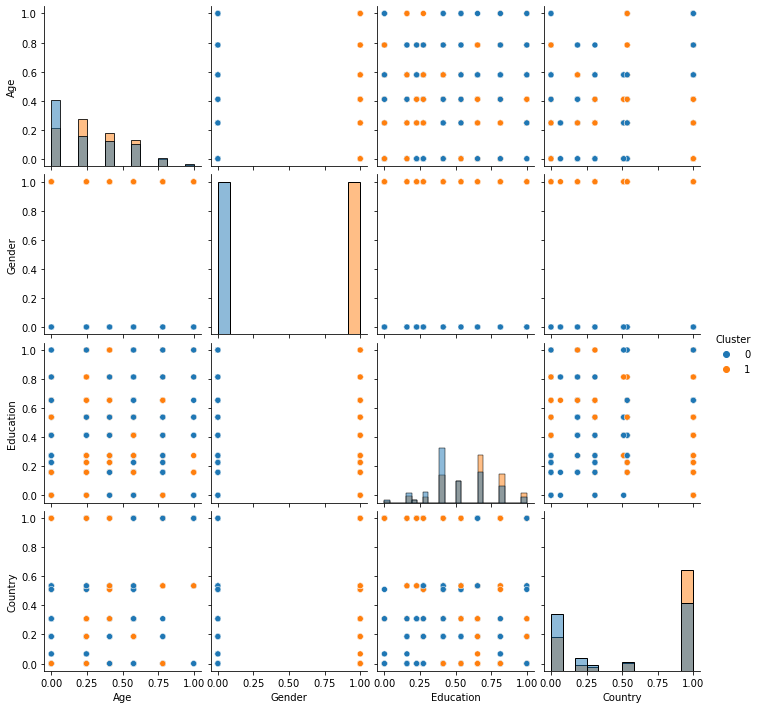

In [22]:
r = sns.pairplot(df_demographic_labeled, hue="Cluster", diag_kind="hist")

Two clusters are generated. \
The **intertia** of clusters generated using all demographic data data is 573.8358078012957 \
The **centroids** are located at (2.51091098e-01, -1.11022302e-16, 5.07954729e-01, 5.05771403e-01) and (3.05748870e-01, 1.00000000e+00, 5.92519929e-01, 7.03591002e-01)

A K-means clustering model is generated using all the demographic data. As could be observed from the pair-plots above, the clusters generated are dispersed around a larger area. This has resulted in the relatively high inertia (sum of squared distances) value generated from the clusters. 

## Perform K-Means Clustering on Personality Data

### Using only two columns

#### Nscore and Cscore

In [23]:
kmeans_personality_nc = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_personality_nc.fit(df_personality[["Nscore", "Cscore"]])

KMeans(n_clusters=2, random_state=0)

In [24]:
# sum of square distances
kmeans_personality_nc.inertia_

44.834961541686425

In [25]:
centroids_personality_nc = kmeans_personality_nc.cluster_centers_
print(centroids_personality_nc)

[[0.42073083 0.58700595]
 [0.62218541 0.39923564]]


Text(0.5921854125760533, 0.3692356439351975, 'Cluster 1')

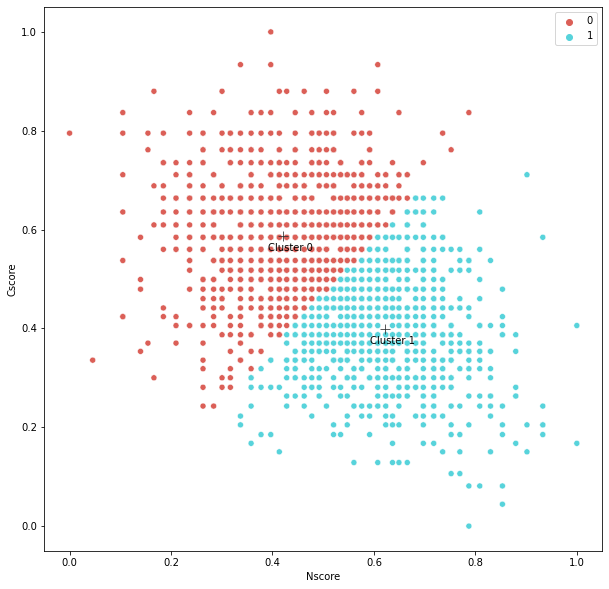

In [26]:
offset = 0.03

personality_nc_pred = kmeans_personality_nc.predict(df_personality[["Nscore", "Cscore"]])
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_personality["Nscore"], y=df_personality["Cscore"], hue=personality_nc_pred, palette='hls')
sns.scatterplot(x=centroids_personality_nc[:,0], y=centroids_personality_nc[:,1], marker='+', color=".2", s=100)
ax.annotate('Cluster 0', xy=(centroids_personality_nc[0,0]-offset, centroids_personality_nc[0,1]-offset))
ax.annotate('Cluster 1', xy=(centroids_personality_nc[1,0]-offset, centroids_personality_nc[1,1]-offset))

Two clusters are generated. \
The **intertia** of clusters generated using Nscore and Cscore data is 44.834961541686425 \
The **centroids** are located at (0.42073083, 0.58700595), (0.62218541, 0.39923564)

#### Escore vs Oscore

In [27]:
kmeans_personality_eo = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_personality_eo.fit(df_personality[["Escore", "Oscore"]])

KMeans(n_clusters=2, random_state=0)

In [28]:
# sum of square distances
kmeans_personality_eo.inertia_

56.51192464087832

In [29]:
centroids_personality_eo = kmeans_personality_eo.cluster_centers_
print(centroids_personality_eo)

[[0.58885998 0.64820745]
 [0.42181319 0.42616224]]


Text(0.3918131876526515, 0.3961622439572665, 'Cluster 1')

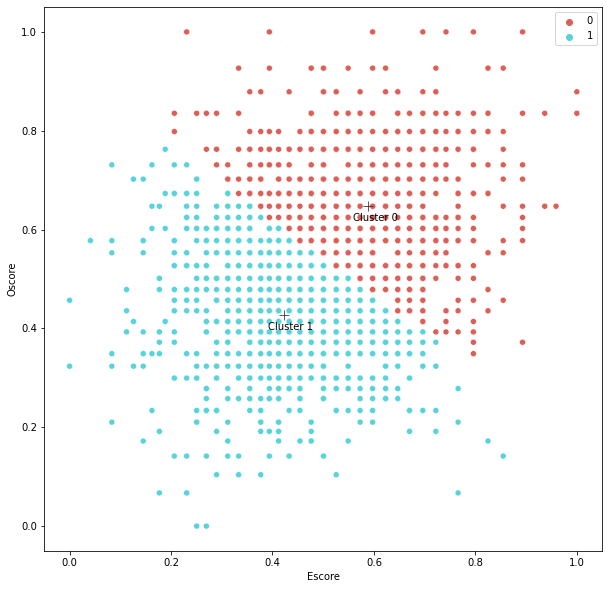

In [30]:
offset = 0.03

personality_eo_pred = kmeans_personality_eo.predict(df_personality[["Escore", "Oscore"]])
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_personality["Escore"], y=df_personality["Oscore"], hue=personality_eo_pred, palette='hls')
sns.scatterplot(x=centroids_personality_eo[:,0], y=centroids_personality_eo[:,1], marker='+', color=".2", s=100)
ax.annotate('Cluster 0', xy=(centroids_personality_eo[0,0]-offset, centroids_personality_eo[0,1]-offset))
ax.annotate('Cluster 1', xy=(centroids_personality_eo[1,0]-offset, centroids_personality_eo[1,1]-offset))

Two clusters are generated. \
The **intertia** of clusters generated using Escore and Oscore data is 56.51192464087832 \
The **centroids** are located at (0.58885998, 0.64820745) and (0.42181319, 0.42616224)

**Nscore vs Escore**

In [31]:
kmeans_personality_ne = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_personality_ne.fit(df_personality[["Nscore", "Escore"]])

KMeans(n_clusters=2, random_state=0)

In [32]:
# sum of square distances
kmeans_personality_ne.inertia_

46.29548310150952

In [34]:
centroids_personality_ne = kmeans_personality_ne.cluster_centers_
print(centroids_personality_ne)

[[0.61623991 0.39202767]
 [0.41904389 0.60051228]]


Text(0.3890438867364535, 0.5705122784953944, 'Cluster 1')

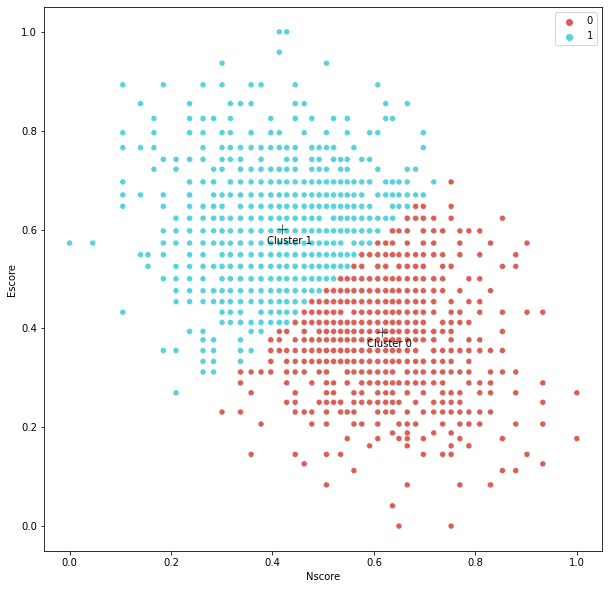

In [35]:
offset = 0.03

personality_ac_pred = kmeans_personality_ne.predict(df_personality[["Nscore", "Escore"]])
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_personality["Nscore"], y=df_personality["Escore"], hue=personality_ac_pred, palette='hls')
sns.scatterplot(x=centroids_personality_ne[:,0], y=centroids_personality_ne[:,1], marker='+', color=".2", s=100)
ax.annotate('Cluster 0', xy=(centroids_personality_ne[0,0]-offset, centroids_personality_ne[0,1]-offset))
ax.annotate('Cluster 1', xy=(centroids_personality_ne[1,0]-offset, centroids_personality_ne[1,1]-offset))

Two clusters are generated. \
The **intertia** of clusters generated using Nscore and Escore data is 46.295483101509525 \
The **centroids** are located at (0.61623991, 0.39202767) and (0.41904389, 0.60051228)

3 K-means cluster models are created using personality data. 

The first K-means cluster is modeled using Nscore and Cscore. The second K-means cluster is modeled using Escore and Oscore. The third K-means cluster is modeled using Nscore and Escore. The inertia values obtained from these 3 K-means model are 44.834961541686425, 56.51192464087832 and 46.295483101509525 respectively. 

Visually, the datapoints are more packed compared to demographic data, and thus resulting in a lower inertia value. 

### Using all the columns from personality data

In [36]:
# set k=2 since we are assuming that there will be two output, namely those with tendancy to do drugs and one which will not. 
kmeans_personality = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmeans_personality.fit(df_personality)

KMeans(n_clusters=2, random_state=0)

In [37]:
# sum of square distances
kmeans_personality.inertia_

273.16252523906337

In [38]:
centroids_personality = kmeans_personality.cluster_centers_
print(centroids_personality)

[[0.53210546 0.52329646 0.59272861 0.4656714  0.45677249 0.58538285
  0.70502243]
 [0.49607368 0.47652976 0.46705443 0.5344403  0.54334571 0.35317163
  0.33152656]]


In [39]:
# pairplot for personality data colored by clusters

personality_pred = kmeans_personality.predict(df_personality)

df_personality_labeled = df_personality
df_personality_labeled = df_personality_labeled.assign(Cluster=pd.Series(personality_pred).values)
df_personality_labeled.head(5)

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cluster
0,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398,1
1,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658,1
2,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957,1
3,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398,1
4,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658,1


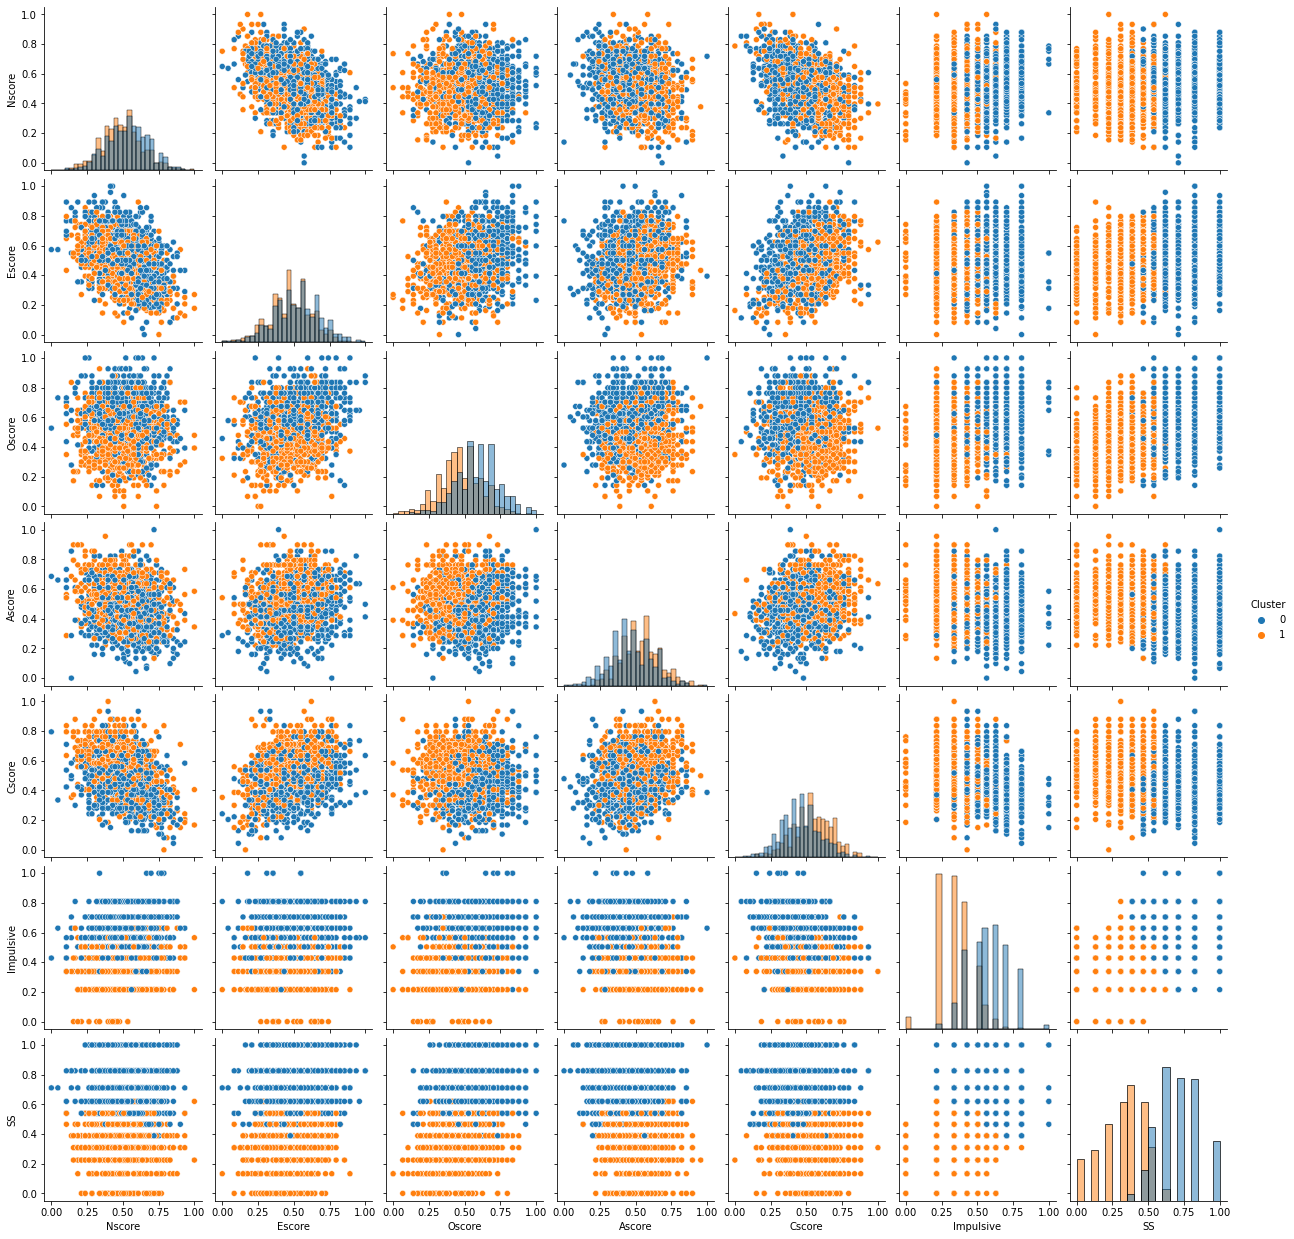

In [40]:
s = sns.pairplot(df_personality_labeled, hue="Cluster", diag_kind="hist")

Two clusters are generated. \
The **intertia** of clusters generated using all personality data is 273.16252523906337 \
The **centroids** are located at (0.53210546, 0.52329646, 0.59272861, 0.4656714,  0.45677249, 0.58538285, 0.70502243) and (0.49607368, 0.47652976, 0.46705443, 0.5344403, 0.54334571, 0.35317163, 0.33152656)

A K-means clustering model is generated using all the personality data. As could be observed from the pair-plot above, the clusters generated using K-means on the personality data are relatively compact as compaird to the clusters generated from demographic data. The inertia value obtained from the clusters arised from personaly feature is less than that of those from demographic feature. 

**Summary**:

Kmeans is used for clustering and kmeans++ method is used to initiate the centroids.
The cluster is then used to evaluate the features by using distance measure. 
Inertia is used to study the compactness of the cluster. Inertia is a measure of sum of squared distances of datapoints to its designated cluster. 

The intertia of clusters generated using all demographic data data is 573.8358078012957.
The intertia of clusters generated using all personality data is 273.16252523906337.

By using inertia as comparison, we observed that the inertia of cluster generated using personlaity data is lower compared to that of using demographic data. We can observe that **higher compactness** of cluster from scatterplot with using **personality data** compared to using demographic data.
So, it can be concluded that the more relevant feature type is **personality**.